In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E:\Desktop\Datasets\house.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [5]:
#check for null values...
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
#summary of the dataset...
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
#description about price column........
df.price.describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [8]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [9]:
df.shape

(4600, 18)

In [10]:
#remove zero values.................
df = df[df.price != 0.000]

In [11]:
df.shape

(4551, 18)

# outlier detection by z-score

In [12]:
def findoutliers(data):
    outliers=[]
    mean=np.mean(data)
    std=np.std(data)
    bound=3
    for i in data:
        z=(i-mean)/std
        if np.abs(z)>3:
            outliers.append(i)
    return outliers

In [13]:
#price outliers....
out_1=findoutliers(df['price'])
out_1

[2384000.0,
 2280000.0,
 3200000.0,
 2400000.0,
 2555000.0,
 2700000.0,
 2453500.0,
 3100000.0,
 2750000.0,
 2400000.0,
 3710000.0,
 2400000.0,
 2700000.0,
 7062500.0,
 2888000.0,
 2250000.0,
 4668000.0,
 2475000.0,
 4489000.0,
 3000000.0,
 2400000.0,
 2466350.0,
 2300000.0,
 3800000.0,
 2300000.0,
 2367000.0,
 2271150.0,
 2351956.0,
 2458000.0,
 2680000.0,
 2321000.0,
 12899000.0,
 26590000.0,
 2560498.333]

# outlier detection by IQR

In [14]:
q1,q3=np.percentile(df['price'],[25,75])

In [15]:
q1

326264.2857

In [16]:
q3

657500.0

In [17]:
IQR=q3-q1

In [18]:
IQR

331235.7143

In [19]:
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

In [20]:
lower_bound

-170589.28574999998

In [21]:
upper_bound

1154353.57145

In [22]:
def findoutliersIQR(data):
    outliersIQR=[]
    for i in data:
        if i>upper_bound or i<lower_bound:
            outliersIQR.append(i)
    return outliersIQR         

In [23]:
out_2=findoutliersIQR(df['price'])
out_2

[2384000.0,
 1400000.0,
 1200000.0,
 1395000.0,
 2280000.0,
 1425000.0,
 1225000.0,
 1580000.0,
 1870000.0,
 1800000.0,
 3200000.0,
 1500000.0,
 1340000.0,
 1532500.0,
 1750000.0,
 1500000.0,
 1307000.0,
 1250000.0,
 2400000.0,
 1370000.0,
 1157200.0,
 1702500.0,
 2238888.0,
 1225000.0,
 1200000.0,
 1575000.0,
 1315000.0,
 1300000.0,
 1346400.0,
 1225000.0,
 1264000.0,
 1895000.0,
 2555000.0,
 1550000.0,
 1400000.0,
 1680000.0,
 1400000.0,
 1222500.0,
 1255000.0,
 2100000.0,
 2000000.0,
 1270000.0,
 1216000.0,
 1405000.0,
 1190000.0,
 1300000.0,
 1212500.0,
 1275000.0,
 1800000.0,
 1690000.0,
 1506000.0,
 1580000.0,
 1220000.0,
 1185000.0,
 1550000.0,
 2700000.0,
 1600000.0,
 1170000.0,
 1180500.0,
 2150000.0,
 1325000.0,
 1610000.0,
 1200000.0,
 2000000.0,
 1680000.0,
 1570000.0,
 1795000.0,
 1655000.0,
 1381000.0,
 1600000.0,
 1710000.0,
 1285000.0,
 1175000.0,
 1400000.0,
 1210000.0,
 1970000.0,
 1400000.0,
 2453500.0,
 3100000.0,
 2750000.0,
 1425000.0,
 2400000.0,
 1385000.0,
 136

<AxesSubplot:ylabel='price'>

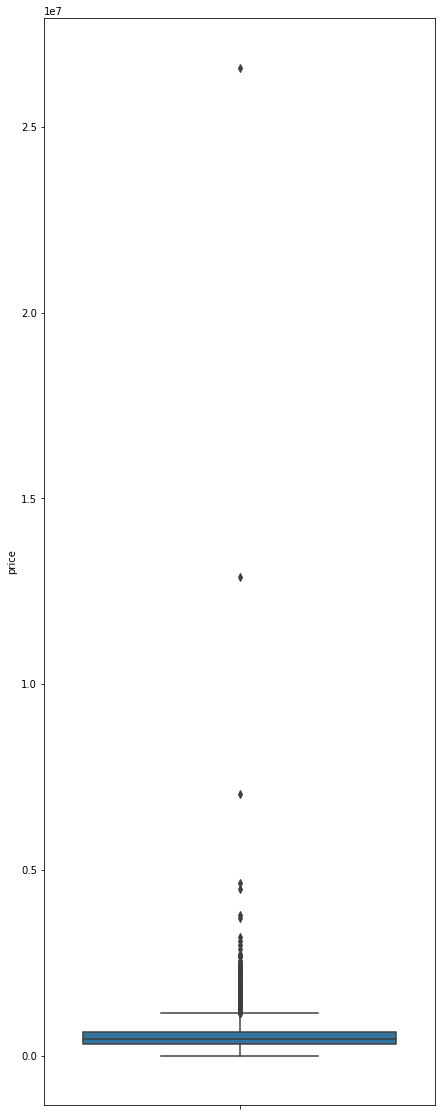

In [24]:
plt.figure(figsize=(7,20))
sns.boxplot(y=df.price)

# outlier detection by percentiles

In [25]:
df['price']

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4551, dtype: float64

In [26]:
#here I got the percentiles 2nd and 99th as limits....
upper_limit=df['price'].quantile(0.93)
lower_limit=df['price'].quantile(0.02)

In [27]:
#correct values without outliers.....
df_in=df[(df['price']<upper_limit) & (df['price']>lower_limit)]

In [28]:
df_in

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,5/2/2014 0:00,342000.0000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,5/2/2014 0:00,490000.0000,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [29]:
df_in.shape

(4140, 18)

In [30]:
#outliers........
df_out=df[(df['price']>upper_limit) | (df['price']<lower_limit)]

In [31]:
df_out

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,5/2/2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
11,5/2/2014 0:00,1.400000e+06,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
14,5/2/2014 0:00,1.200000e+06,5,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969,3534 46th Ave NE,Seattle,WA 98105,USA
99,5/5/2014 0:00,1.395000e+06,5,3.50,4010,8510,2.0,0,1,5,2850,1160,1971,0,3930 NE Belvoir Pl,Seattle,WA 98105,USA
107,5/5/2014 0:00,1.090000e+06,4,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0,8814 218th Ave NE,Redmond,WA 98053,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,6/16/2014 0:00,1.637857e+05,2,1.00,760,5500,1.5,0,0,3,760,0,1947,2012,11023 4th Ave S,Seattle,WA 98168,USA
4556,6/27/2014 0:00,1.675000e+05,1,1.00,690,1950,1.0,0,0,3,690,0,1928,1954,7554 14th Ave NW,Seattle,WA 98117,USA
4560,6/30/2014 0:00,1.322500e+05,4,2.25,1830,8734,2.0,0,0,4,1830,0,1991,0,12116 SE 261st Ct,Kent,WA 98030,USA
4568,7/2/2014 0:00,1.683333e+05,2,1.00,1050,6600,1.5,0,0,3,1050,0,1964,2000,13407 8th Ave S,Burien,WA 98168,USA


In [32]:
df_out.shape

(408, 18)

C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

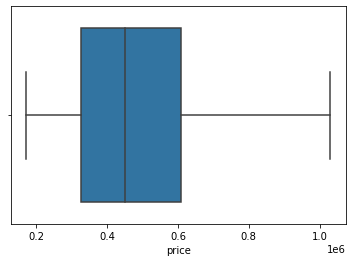

In [33]:
sns.boxplot(df_in['price'])

In [34]:
#sns.distplot(df['price'])

In [35]:
df['price'].mean()

557905.8991377723

In [36]:
df['price'].describe()

count    4.551000e+03
mean     5.579059e+05
std      5.639299e+05
min      7.800000e+03
25%      3.262643e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64

In [37]:
upper_limit_std=df.price.mean()+3*df.price.std()
upper_limit_std

2249695.5129743437

In [38]:
lower_limit_std=df.price.mean()-3*df.price.std()
lower_limit_std

-1133883.714698799

In [39]:
df.price.std()

563929.8712788571

In [40]:
#outliers........
#df[(df.price>upper_limit_std) | df.price<lower_limit_std]

In [41]:
#correct values....
#df[(df.price<upper_limit_std) & df.price>lower_limit_std]